#### Estimates the Value at Risk (VaR) and Conditional Value at Risk (CVaR) for the S&P 500 index
- Parametric method
- Historical Simulation method


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the S&P 500 data
df = pd.read_csv('sp500.csv', parse_dates=['Date'], index_col='Date')
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1318 entries, 2020-01-02 to 2025-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1318 non-null   float64
 1   High    1318 non-null   float64
 2   Low     1318 non-null   float64
 3   Open    1318 non-null   float64
 4   Volume  1318 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.8 KB
None


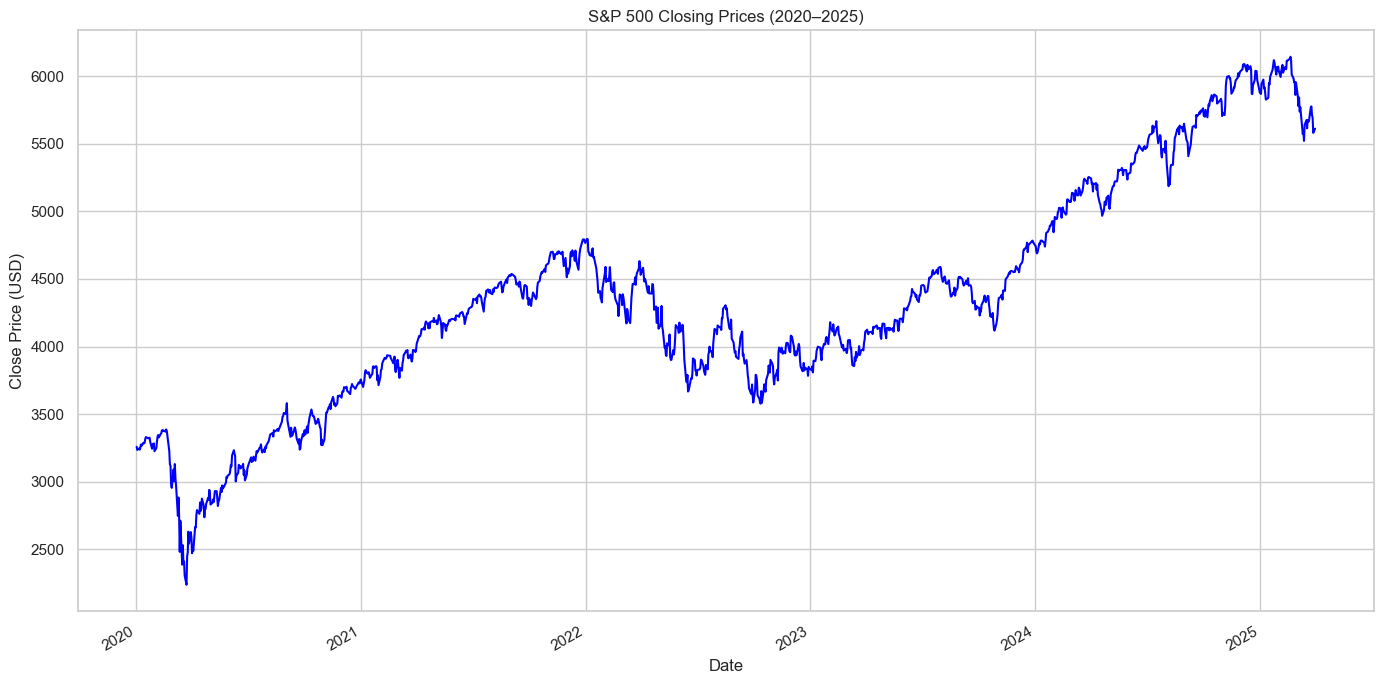

In [31]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()
# Plot Adjusted Closing Prices
plt.figure(figsize=(14, 7))
df['Close'].plot(title='S&P 500 Closing Prices (2020–2025)', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change().dropna()

# Parameters
confidence_level = 0.95
alpha = 1 - confidence_level

# Parametric VaR (Variance-Covariance Method)
mean_return = df['Daily Return'].mean()
std_dev = df['Daily Return'].std()
z_score = norm.ppf(confidence_level)

parametric_var = mean_return + z_score * std_dev
parametric_cvar = parametric_var * (1 - confidence_level)

# Historical Simulation VaR
historical_var = np.percentile(df['Daily Return'].dropna(), alpha * 100)

# Historical Simulation CVaR
tail_losses = df['Daily Return'][df['Daily Return'] <= historical_var]
historical_cvar = tail_losses.mean()

# Print results
print(f"\nParametric Method")
print(f"Parametric VaR at {confidence_level*100}% confidence level: {parametric_var:.4%}")
print(f"Parametric CVaR at {confidence_level*100}% confidence level: {parametric_cvar:.4%}")
print(f"\nHistorical Method")
print(f"Historical VaR at {confidence_level*100}% confidence level: {historical_var:.4%}")
print(f"Historical CVaR at {confidence_level*100}% confidence level: {historical_cvar:.4%}")


Parametric Method
Parametric VaR at 95.0% confidence level: 2.2405%
Parametric CVaR at 95.0% confidence level: 0.1120%

Historical Method
Historical VaR at 95.0% confidence level: -1.8595%
Historical CVaR at 95.0% confidence level: -3.1896%


##### Plot Daily Returns

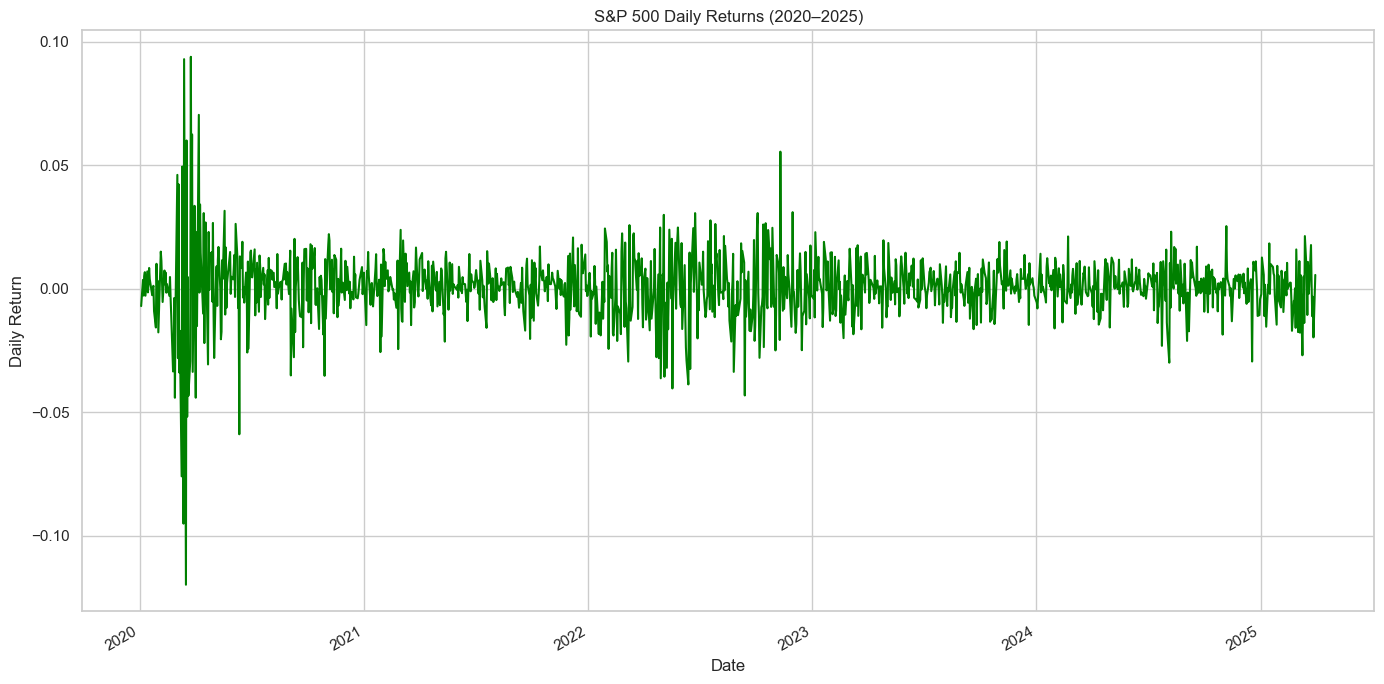

In [33]:
plt.figure(figsize=(14, 7))
df['Daily Return'].plot(title='S&P 500 Daily Returns (2020–2025)', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Plot the distribution of daily returns using KDE

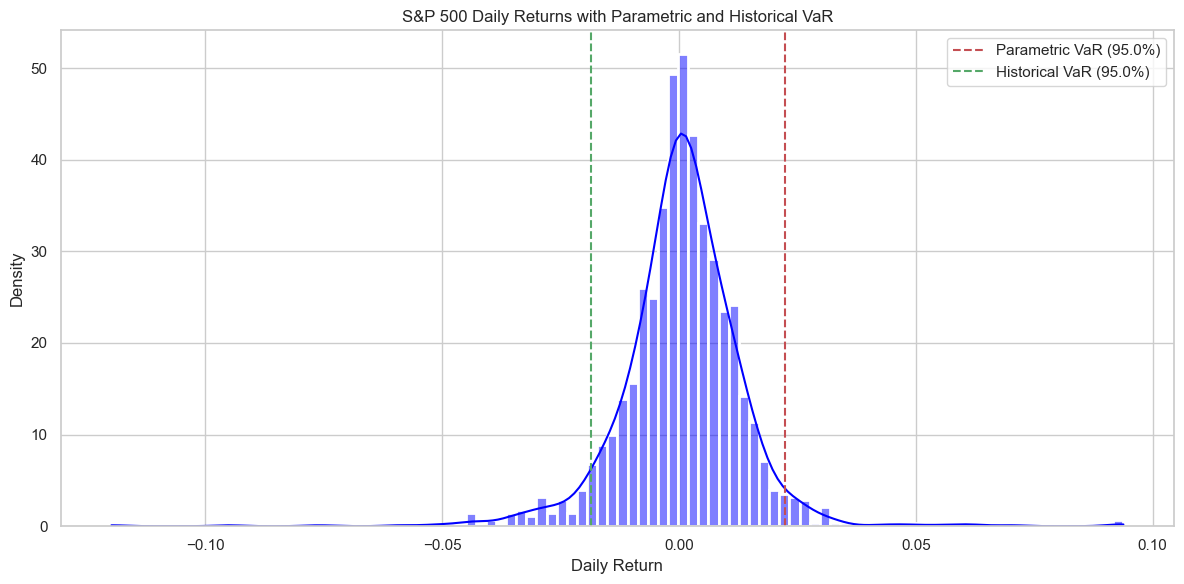

In [34]:
# Set the Seaborn style
sns.set(style="whitegrid")
# Plat
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='blue', stat="density", linewidth=2)
plt.axvline(x=parametric_var, color='r', linestyle='--', label=f'Parametric VaR ({confidence_level*100}%)')
plt.axvline(x=historical_var, color='g', linestyle='--', label=f'Historical VaR ({confidence_level*100}%)')
plt.title('S&P 500 Daily Returns with Parametric and Historical VaR')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot the CDF of the daily returns

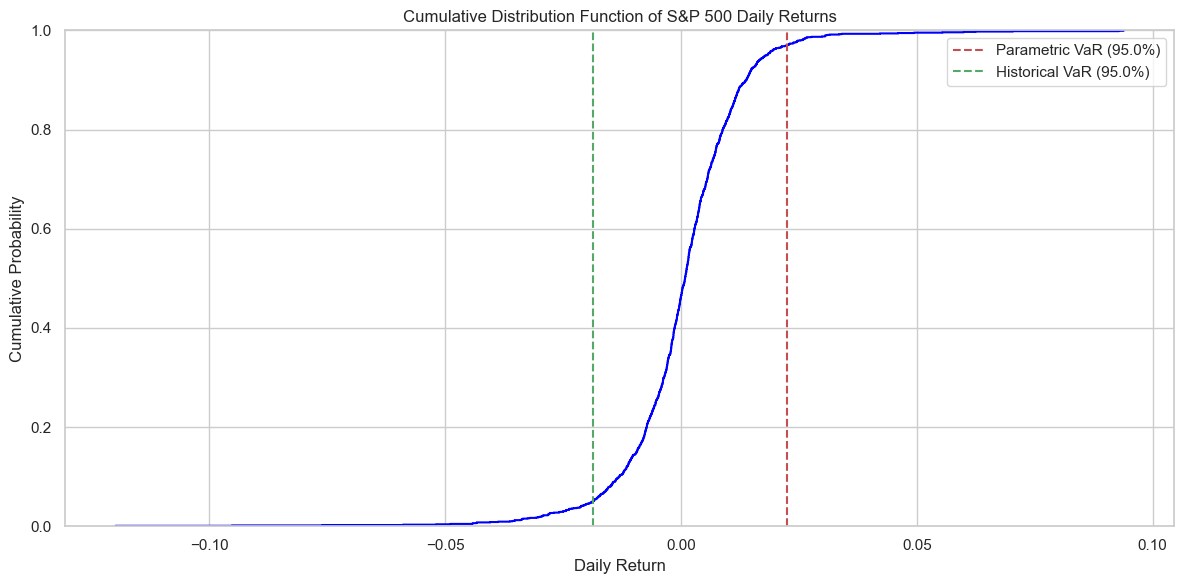

In [35]:
# Set the Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['Daily Return'].dropna(), color='blue')
plt.axvline(x=parametric_var, color='r', linestyle='--', label=f'Parametric VaR ({confidence_level*100}%)')
plt.axvline(x=historical_var, color='g', linestyle='--', label=f'Historical VaR ({confidence_level*100}%)')
plt.title('Cumulative Distribution Function of S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()